## W3&W4 post studio exercises (errors, model fitting)

Enter your solution in the cell(s) below each exercise. Add couple of inline comments explaining your code. Don't forget to add comments in markdown cell after each exercise. Missing comments (in markdown cells and/or inline) and late submissions will incur penalties.

Once done, drag&drop your python file to your ADS1002-name github account.

Copy url of this file on github to appropriate folder on Moodle by 09.30am prior your next studio. 

Solutions will be released later in the semester.

Max 10 marks - 2.5 marks per each exercise.

***
We will use 

* [who-health-data.csv](https://gitlab.erc.monash.edu.au/bads/data-challenges-resources/-/tree/main/Machine-Learning/Supervised-Methods/who-health-data.csv)

* [wisconsin-cancer-data.csv](https://gitlab.erc.monash.edu.au/bads/data-challenges-resources/-/tree/main/Machine-Learning/Supervised-Methods/kaggle-wisconsin-cancer.csv)

throughout the exercises. Download the datasets into the same directory as your post-studio notebook.

In [269]:
# Impor t all the required modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Specialised functions for calculating prediction error rates.
from sklearn.metrics import precision_score

import warnings
warnings.filterwarnings("ignore")

In [270]:
who_data_2015 = (
    pd.read_csv("who-health-data.csv") # Read in the csv data.
    .rename(columns=lambda c: c.strip())      # Clean up column names.
    .query("Year == 2015")                    # Restrict the dataset to records from 2015.
    # Removes two columns which contain a lot of missing data...
    .drop(columns=["Alcohol", "Total expenditure"])
    # ... then drop any rows with missing values.
    .dropna()
)

wisconsin_cancer_biopsies = (
    pd.read_csv("kaggle-wisconsin-cancer.csv")
    # This tidies up the naming of results (M -> malignant, B -> benign)
    .assign(diagnosis=lambda df: df['diagnosis']  
        .map({"M": "malignant", "B": "benign"})
        .astype('category')
    )
)

### Exercise 1

Given the dataframe `ex1_who_with_predictions` below, compute the Mean Absolute Error for the predicted values of life expectancy. You can repeat the process previously shown, or find a function in `sklearn.metrics` to compute this for you.

In [271]:
ex1_who_with_predictions = (
    who_data_2015[["Schooling", "Life expectancy"]]
    .assign(Predicted=lambda df: df["Schooling"] * 2.3 + 43)
    .dropna()
)
ex1_who_with_predictions.head()

,Schooling,Life expectancy,Predicted
0,10.1,65.0,66.23
16,14.2,77.8,75.66
32,14.4,75.6,76.12
48,11.4,52.4,69.22
80,17.3,76.3,82.79


In [272]:
# Compute mean absolute error.
errors=ex1_who_with_predictions['Predicted']- ex1_who_with_predictions['Life expectancy']
mae_score = errors.abs().mean()
print(f"Mean absolute error is {mae_score:.1f} years")

Mean absolute error is 3.8 years


### Exercise 2

Given the classification predictions and actual results in the dataframe `ex2_biopsies_with_predictions` below, compute accuracy, precision and recall. Also find the number of false negatives.

In [273]:
ex2_biopsies_with_predictions = (
    wisconsin_cancer_biopsies
    .assign(prediction=lambda df: df['texture_mean'].lt(20)
        .map({True: "benign", False: "malignant"})
    )
    [['radius_mean', 'texture_mean', 'diagnosis', 'prediction']]
)
ex2_biopsies_with_predictions.head()

,radius_mean,texture_mean,diagnosis,prediction
0,17.99,10.38,malignant,benign
1,20.57,17.77,malignant,benign
2,19.69,21.25,malignant,malignant
3,11.42,20.38,malignant,malignant
4,20.29,14.34,malignant,benign


In [274]:
# we group the data by number of diagnosis and prediction
ex2_biopsies_with_predictions.groupby(['diagnosis','prediction'])['texture_mean'].count().unstack()

prediction,benign,malignant
diagnosis,,
benign,274,83
malignant,70,142


From the table above, we found that the number of false negative is **70**.

In [275]:
TP = 142   # True positives
TN = 274  # True negatives
FP = 83   # False positives
FN = 70   # False negatives
TOTAL = TP + TN + FP + FN


# We find the accuracy, precision and recall
print(f"Accuracy = {(TP + TN) / TOTAL = :.3f}")
print(f"Precision = {TP / (TP + FP) = :.3f}")
print(f"Recall = {TP / (TP + FN) =:.3f}")



Accuracy = (TP + TN) / TOTAL = 0.731
Precision = TP / (TP + FP) = 0.631
Recall = TP / (TP + FN) =0.670


### Exercise 3

Consider three different predictors for the cancer biopsy screening dataset:

* Predictor A has an accuracy of 0.95, and recall of 0.99
* Predictor B has an accuracy of 0.99, and recall of 0.95
* Predictor C has an accuracy of 0.5, and a recall of 1.0

The test required to collect data from a new patient (on which the predictor will give a predicted diagnosis) is minimally invasive. If the predictor predicts a positive (malignant) diagnosis, the patient will be referred for further screening which can be expensive.

Considering the context, which predictive model (A, B, or C) would likely be preferred for this task? Write your answer in a markdown cell below, and give a brief explanation of your reasoning.

<hr>

**Answer:**<br>
The best predictive model is **Predictor A** as its recall is higher, with a well balanced of high accuracy also. A high recall is extremely important to track **all the postive cases (malignant)**. Although Predictor A has a slightly low accuracy than Predictor B, but the higher recall is more crucial to prevent any mistrack of positive cases, where missing of even a slight chances of positive case in cancer screening is fatal and not acceptable.<br><br>
On the other hand, Predictor C has a way too low accuracy despite of its extremely high recall. This may cause too many false positve cases to be detected which may cause anxiety to those who have no cancer but being detected as cancer.
<hr>


### Exercise 4

Choose one different input/feature variable (other than Schooling) and fit a linear regression model to predict Life Expectancy using sklearn. Can you achieve a better error rate than what we found in pre-studio notebook? (RMSE and MAE for Schooling were 4.71 and 3.69, respectively.) Suggest a method to narrow down your choices of variables to use in order to arrive at a good model. 

Hint 1: Correlation.

Hint 2: You can use the functions written in the pre-studio notebook, e.g. prediction_root_mean_squared_error(gradient, intercept), to calculate the model error once you choose your model parameters (features).

<hr>

A good method to narrow down my choices of variables to arrive at a good model is build a heatmap first. By this way, we can see which variable are highly correlated and then achieving a better error rate.

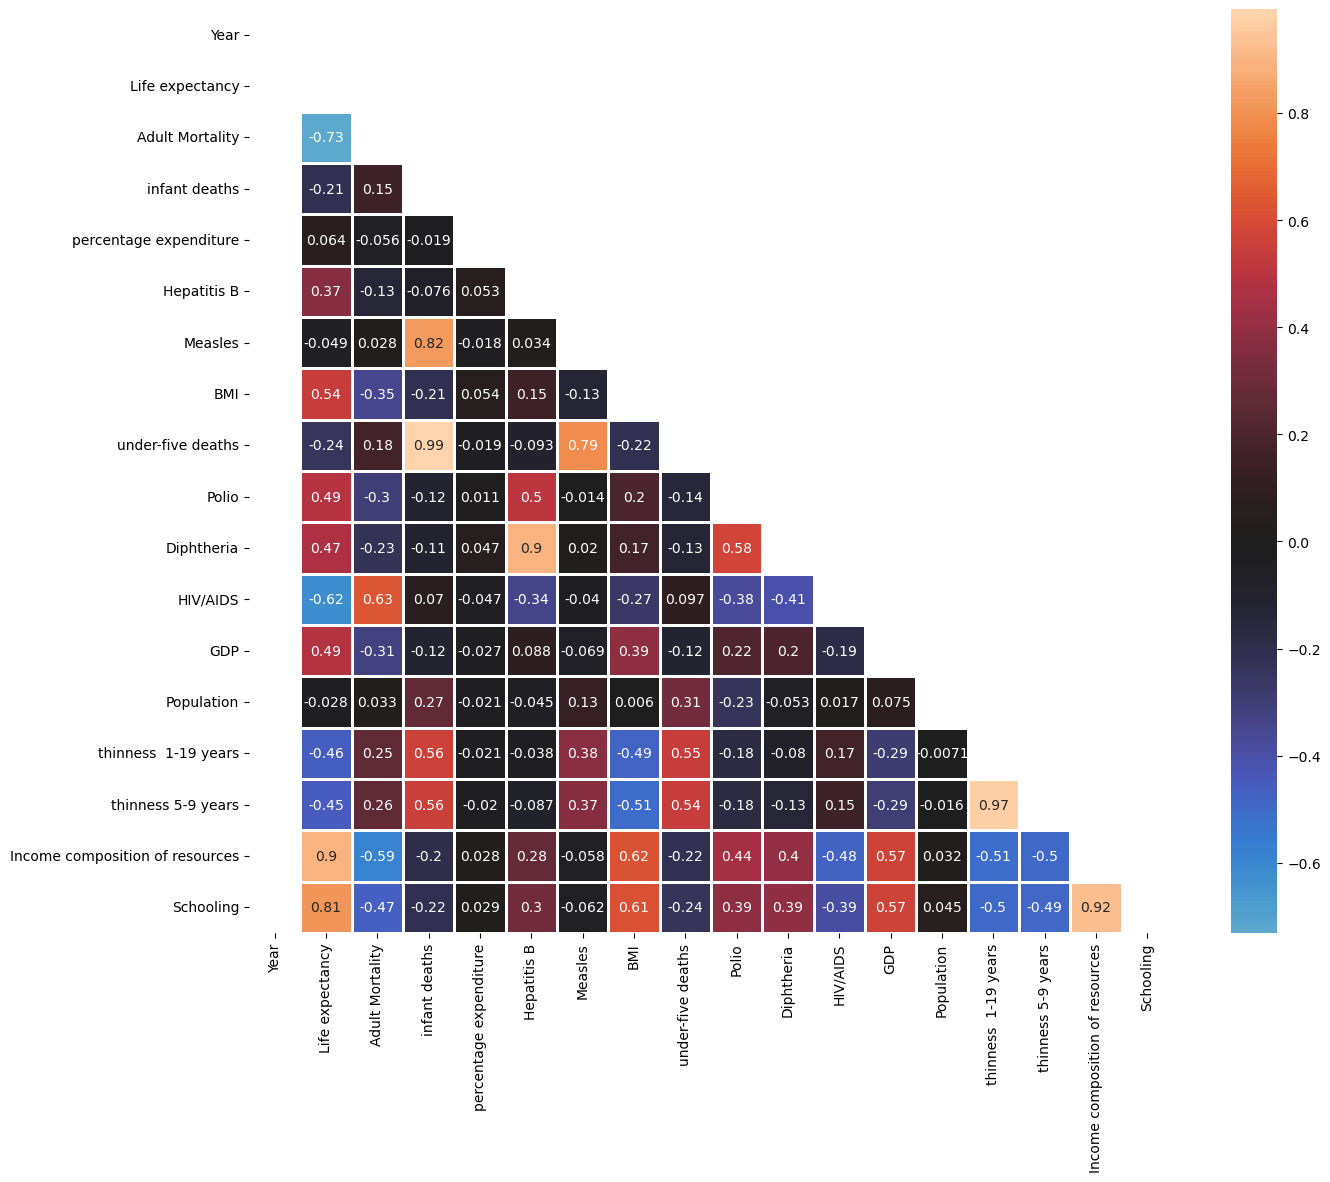

In [276]:
# Step 1: Find the correlation between variable first
it = who_data_2015.select_dtypes(include=['int', 'float'])
corrs = it.corr() # calculate the correlation table
# as this is a symmetric table, set up a mask so that we only plot values below the main diagonal
mask = np.triu(np.ones_like(corrs, dtype=bool)) 
f, ax = plt.subplots(figsize=(10, 8)) # initialise the plots and axes
# plot the correlations as a seaborn heatmap, with a colourbar
fig = plt.gcf()  # or by other means, like plt.subplots
figsize = fig.get_size_inches()
fig.set_size_inches(figsize * 1.5)  # scale current size by 1.5
sns.heatmap(corrs, mask=mask, center=0, annot=True, square=True, linewidths=.8);


Based on the heatmap above, we can see that the correlation between **Income composition of resources** and **Life expectancy** has the highest correlation.

Hence, we will pick **Income composition of resources** as the feature variable.

In [277]:
# Prepare the x and y data
X = who_data_2015[['Income composition of resources']].dropna()
y = who_data_2015['Life expectancy'].dropna()


# fit the variable to a linear regression model
model = LinearRegression(fit_intercept=True)
model.fit(X, y)

# Predicting and calculating error rates
y_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
mae = mean_absolute_error(y, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")


RMSE: 3.504293642534378
MAE: 2.7371964876087294


The RMSE and MAE has improved when we use **Income composition of resources** as the feature variable.
<hr>

Step 2 is we use the error minimising method which is the **gradient descent method** to calculate the model error based on  root mean squared error (RMSE) and mean absolute error (MSE). <br>
<br>
Note that all functions come from the week 4 pre studio notebook.

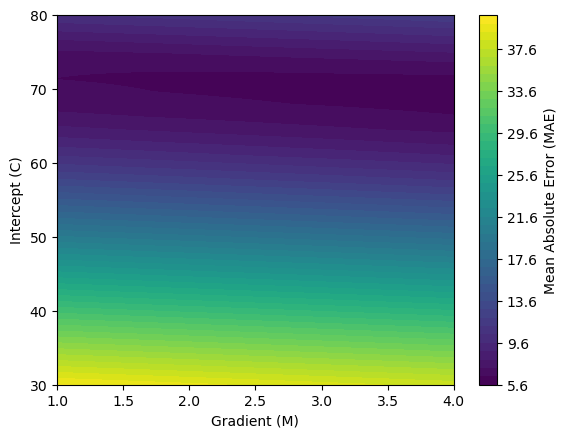

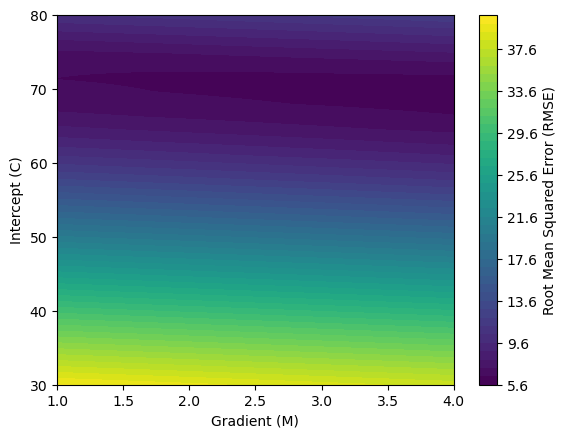

In [278]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def prediction_root_mean_squared_error(gradient, intercept):
    """Return the prediction error associated with the value of the parameters using Feature_X."""
    predictions = who_data_2015["Income composition of resources"] * gradient + intercept
    actual = who_data_2015["Life expectancy"]
    return mean_squared_error(y_true=actual, y_pred=predictions, squared=False)

def prediction_mean_absolute_error(gradient, intercept):
    """Return the prediction error associated with the value of the parameters using Feature_X."""
    predictions = who_data_2015["Income composition of resources"] * gradient + intercept
    actual = who_data_2015["Life expectancy"]
    return mean_absolute_error(y_true=actual, y_pred=predictions)


# Grid of possible gradient and intercept values
gradient_values, intercept_values = np.meshgrid(
    np.linspace(1, 4.0, 50),
    np.linspace(30, 80, 30),
)

# Initialize arrays to store error values
rmse_errors = np.zeros(gradient_values.shape)
mae_errors = np.zeros(gradient_values.shape)

# Compute RMSE and MAE for each combination of gradient and intercept
for i in range(rmse_errors.shape[0]):
    for j in range(rmse_errors.shape[1]):
        rmse_errors[i, j] = prediction_root_mean_squared_error(gradient_values[i, j], intercept_values[i, j])
        mae_errors[i, j] = prediction_mean_absolute_error(gradient_values[i, j], intercept_values[i, j])

# The lowest values in rmse_errors and mae_errors would give you the best gradient and intercept for Feature_X.

def mae_plot():
    plt.figure()
    plt.contourf(gradient_values, intercept_values, mae_errors, levels=50)
    plt.xlabel("Gradient (M)")
    plt.ylabel("Intercept (C)")
    plt.colorbar(label="Mean Absolute Error (MAE)")

def rmse_plot():
    plt.figure()
    plt.contourf(gradient_values, intercept_values, mae_errors, levels=50)
    plt.xlabel("Gradient (M)")
    plt.ylabel("Intercept (C)")
    plt.colorbar(label="Root Mean Squared Error (RMSE)")



In [279]:
from scipy.optimize import minimize

# This sets initial guess values (gradient = 3, intercept = 60) for the algorithm to
# use as a starting point. You can change these and re-run the cell to observe the
# different paths taken by the algorithm.
initial_guess = (3, 60)


# We'll record the different model parameters tested in these lists.
gradient_steps = [initial_guess[0]]
intercept_steps = [initial_guess[1]]

def callback(values, *args, **kwargs):
    """ This function is called by `minimize` whenever it takes a step. This allows the
    steps to be recorded """
    gradient_steps.append(values[0])
    intercept_steps.append(values[1])
    print(f"Step {values}: Gradient = {values[0]}, Intercept = {values[1]}")

def prediction_error(coefficients):
    """ This function is called with both coefficients (gradient and intercept) as a tuple.
    It returns the result of the error calculation which scipy.optimise will use """
    gradient, intercept = coefficients
    return prediction_root_mean_squared_error(gradient, intercept)

# Run the gradient descent algorithm and extract the optimal model parameter values.
opt_result = minimize(
    prediction_error,      # error evaluation function
    initial_guess,         # an initial guess of the model parameters
    
    callback=callback,     # a function to record trial points
)

# This gives some status information and the model parameter results.
opt_result

Step [ 5.98585057 63.77662838]: Gradient = 5.98585057258606, Intercept = 63.776628375053406
Step [ 7.78710479 65.95035641]: Gradient = 7.78710479233571, Intercept = 65.9503564059211
Step [ 9.88318177 64.92762269]: Gradient = 9.883181772974853, Intercept = 64.92762269042332
Step [29.68408349 52.9767841 ]: Gradient = 29.684083493922813, Intercept = 52.976784098583565
Step [55.42309631 34.98606513]: Gradient = 55.423096314167665, Intercept = 34.986065133700286
Step [47.80014756 38.77544309]: Gradient = 47.80014755818392, Intercept = 38.77544309467634
Step [47.58545964 38.5580751 ]: Gradient = 47.585459637706336, Intercept = 38.55807510422169
Step [47.45915273 38.71714376]: Gradient = 47.45915272950144, Intercept = 38.71714376498298
Step [47.50414171 38.68643103]: Gradient = 47.50414171086451, Intercept = 38.686431028569
Step [47.49583035 38.69170877]: Gradient = 47.49583035010113, Intercept = 38.69170877081331


  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 3.5042936425452433
        x: [ 4.750e+01  3.869e+01]
      nit: 10
      jac: [-1.729e-06 -2.474e-06]
 hess_inv: [[ 1.544e+02 -1.042e+02]
            [-1.042e+02  7.385e+01]]
     nfev: 48
     njev: 16

Model is y = 47.50x + 38.69
RMSE = 3.50
MAE = 2.74


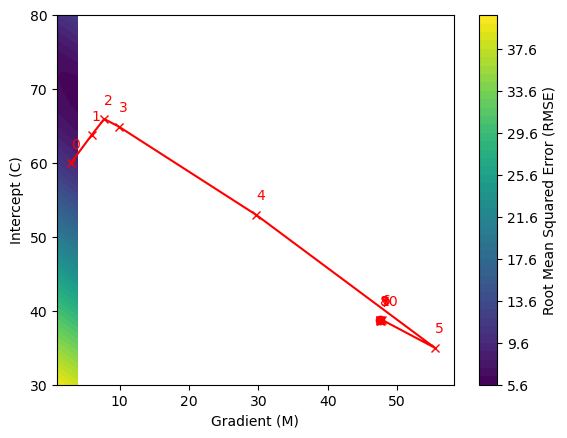

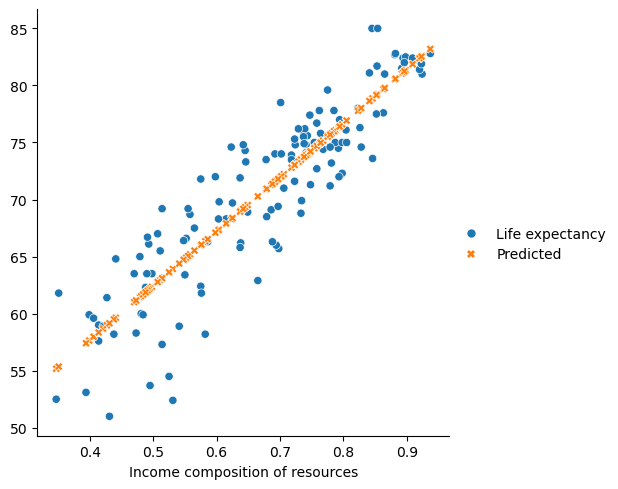

In [280]:
def plot_gradient_descent_path(gvals, ivals):
    """ Plots the path taken to find the minimum value. """    
    plt.plot(gvals, ivals, 'r-x')
    for n, (g, i) in enumerate(zip(gvals, ivals)):
        plt.text(g + 0.02, i + 2, str(n), color='r')
    plt.scatter(gvals[-1], ivals[-1], c='r')

def plot_predictions(gradient, intercept):
    """ Plot the model predictions using the given parameters. """
    # Generate predictions using the selected gradient and intercept.
    who_with_predictions = (
        who_data_2015[["Income composition of resources", "Life expectancy"]]
        # Add a column with a computed prediction based on income composition of resources.
        .assign(Predicted=lambda df: df["Income composition of resources"] * gradient + intercept)
        # Discard for the moment any row where we can't make a prediction
        # due to missing data.
        .dropna()
    )
    # Plot both the predicted and actual life expectancy results against income composition of resources.
    sns.relplot(data=who_with_predictions.set_index("Income composition of resources"))

optimal_gradient, optimal_intercept = opt_result.x
rmse_plot()
plot_gradient_descent_path(gradient_steps, intercept_steps)
plot_predictions(optimal_gradient, optimal_intercept)

# Display the model and prediction error.
print("Model is y = {:.2f}x + {:.2f}".format(optimal_gradient, optimal_intercept))
print("RMSE = {:.2f}".format(prediction_root_mean_squared_error(optimal_gradient, optimal_intercept)))
print("MAE = {:.2f}".format(prediction_mean_absolute_error(optimal_gradient, optimal_intercept)))

OR using the Ordinary Least Square method

Model is y = 47.50x + 38.69
RMSE = 3.50
MAE = 2.74


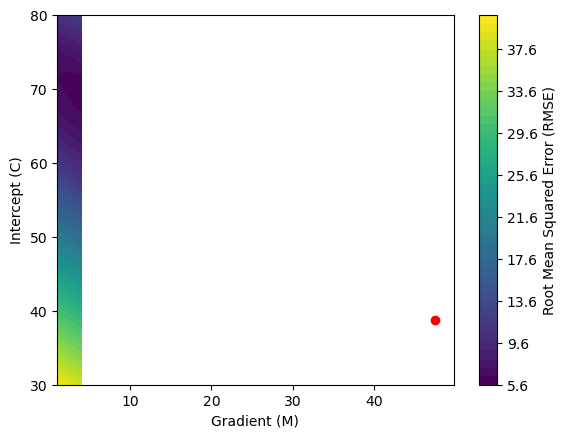

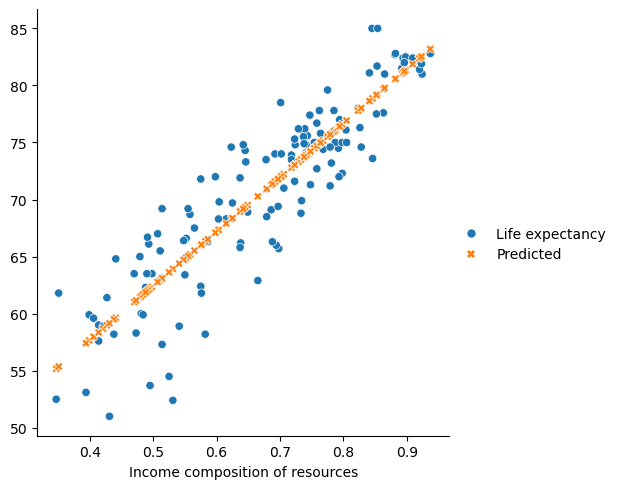

In [281]:
# Set up the data matrices X and y (note we add a column of ones to X).
X = np.matrix(who_data_2015[['Income composition of resources']].assign(constant=1).values)
y = who_data_2015["Life expectancy"].values

# Compute the model parameters through matrix multiplication.
beta = np.linalg.inv(X.transpose() @ X) @ X.transpose() @ y
optimal_gradient, optimal_intercept = beta.tolist()[0]

# Plot the cost function contours and the parameter values which minimise it.
rmse_plot()
plt.scatter(optimal_gradient, optimal_intercept, c='r')
plot_predictions(optimal_gradient, optimal_intercept)

# Also display the prediction error.
print("Model is y = {:.2f}x + {:.2f}".format(optimal_gradient, optimal_intercept))
print("RMSE = {:.2f}".format(prediction_root_mean_squared_error(optimal_gradient, optimal_intercept)))
print("MAE = {:.2f}".format(prediction_mean_absolute_error(optimal_gradient, optimal_intercept)))

    These two methods gives the same value of RMSE and MAE.

<hr>

## Extra exercises

The following exercises with (*) will not be assessed. Use these to check your understanding of topics covered in the past 2 weeks.

### Exercise 5*

The function `model_correct_predictions` below returns the number of correct predictions made by a predictive model for the cancer biopsy dataset, for a given parameter value. This parameter value simply controls the threshold value for radius above which a sample is predicted as malignant.

Try different values of the parameter in this model within the range [0, 30]. Record and plot the resulting accuracy values against the parameter value (similar to the regression cost function example above).

What value of the parameter provides the best error rate? Explain how can you be confident you have found the best result here.

In [282]:
def model_correct_predictions(radius_split_parameter):
    """ Return the number of correct predictions made by the model
    for the given parameter value. """
    data = wisconsin_cancer_biopsies.assign(
        predicted=lambda df: df['radius_mean'].lt(radius_split_parameter)
            .map({True: "benign", False: "malignant"})
    )
    return (data['diagnosis'] == data['predicted']).sum()

model_correct_predictions(12)

369

### Exercise 6*

In examples in pre-studio notebook (W4) we have used root mean squared error (the standard cost function for linear regression) to fit the model parameters. Try re-running the `scipy.optimise` method using mean absolute error. Are the resulting model parameters the same as above? Give some brief reasoning why there might be a difference here.

In [283]:
# Hint: you only need to make one small change in the prediction_error function to do this.

In [284]:
def prediction_root_mean_squared_error(gradient, intercept):
    """ Return the prediction error associated with the value of the parameters.
    This time around, let's use sklearn.metrics. """
    predictions = who_data_2015["Schooling"] * gradient + intercept
    actual = who_data_2015["Life expectancy"]
    # Note that `squared=False` gives us RMSE. Then we're in the same units as MAE.
    return mean_squared_error(y_true=actual, y_pred=predictions, squared=False)

def prediction_mean_absolute_error(gradient, intercept):
    """ Return the prediction error associated with the value of the parameters.
    This time around, let's use sklearn.metrics. """
    predictions = who_data_2015["Schooling"] * gradient + intercept
    actual = who_data_2015["Life expectancy"]
    return mean_absolute_error(y_true=actual, y_pred=predictions)

### Exercise 7*

We can see above that different methods for determining model parameters arrive at the same result, but what happens if we change the dataset slightly. Experiment by taking several (at least 10) different samples of the data, fitting a linear model for each one, and plotting a histogram of the different gradient and intercept coefficients you find. Is there a significant amount of variation in the parameter values?

In [285]:
sample_data = who_data_2015.sample(30)  # selects a small sample of 30 random rows from the data.